In [10]:
import csv
import numpy as np 
import matplotlib.pyplot as plt 

def read_esp(filename):
    data = []
    frequencies = []
    impedances = []
    stringList = ['File date:', 'Measurement:', 'Notes:', 'Date and time:', 'Fixed at']
    startFlag = False
    with open(filename,'rU', encoding="utf8", errors='ignore') as file:
        reader = csv.reader((line.replace('\0','') for line in file), delimiter=",")
        next(reader) # skip line 1
        for line in reader:
            if line == []:
                continue
            elif any(n in line[0] for n in stringList):
                if startFlag == True:
                    startFlag = False
                    data.append([frequencies, impedances])
                    frequencies = []
                    impedances = []
                continue
            elif line[0] == 'freq / Hz':
                startFlag = True
            else:
                if startFlag == True:
                    frequencies.append(float(line[0]))
                    impedances.append(float(line[3]))
    data.append([frequencies, impedances])
    data = np.array(data)
    return data

/var/folders/4s/2th_wk5517xdthbq54b0klrc0000gn/T/ipykernel_13115/2581719468.py:11: DeprecationWarning: 'U' mode is deprecated
  with open(filename,'rU', encoding="utf8", errors='ignore') as file:


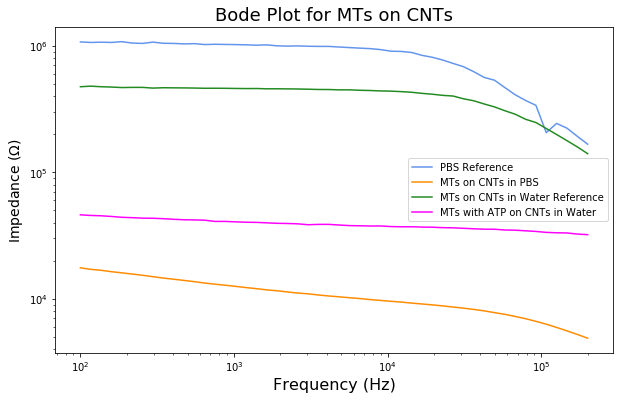

In [18]:
data = read_esp(R'Microtubules_.csv')

MT_water = data[0]
MT_water_ATP = data[3]
MT_PBS = data[1]
PBS = data[4] 

plt.figure(figsize=(10,6))
plt.plot(PBS[0], PBS[1], label='PBS Reference', color='cornflowerblue')
plt.plot(MT_PBS[0], MT_PBS[1], label='MTs on CNTs in PBS', color='darkorange')
plt.plot(MT_water[0], MT_water[1], label='MTs on CNTs in Water Reference', color='forestgreen')
plt.plot(MT_water_ATP[0], MT_water_ATP[1], label='MTs with ATP on CNTs in Water', color='magenta')
plt.yscale('log')
plt.xscale('log')
plt.title('Bode Plot for MTs on CNTs', fontsize=18)
plt.ylabel('Impedance ($\Omega$)', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.legend()
plt.savefig('MTs_on_CNTs_initial_testing.png', bbox_inches='tight', dpi=300)
plt.show()